/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


11
Training Epoch: [100/5000], Loss: 0.6107
Training Epoch: [200/5000], Loss: 0.4905
Training Epoch: [300/5000], Loss: 0.4146
Training Epoch: [400/5000], Loss: 0.4043
Training Epoch: [500/5000], Loss: 0.4009
Training Epoch: [600/5000], Loss: 0.3991
Training Epoch: [700/5000], Loss: 0.3975
Training Epoch: [800/5000], Loss: 0.3956
Training Epoch: [900/5000], Loss: 0.3935
Training Epoch: [1000/5000], Loss: 0.3910
Training Epoch: [1100/5000], Loss: 0.3882
Training Epoch: [1200/5000], Loss: 0.3853
Training Epoch: [1300/5000], Loss: 0.3823
Training Epoch: [1400/5000], Loss: 0.3795
Training Epoch: [1500/5000], Loss: 0.3769
Training Epoch: [1600/5000], Loss: 0.3747
Training Epoch: [1700/5000], Loss: 0.3729
Training Epoch: [1800/5000], Loss: 0.3714
Training Epoch: [1900/5000], Loss: 0.3701
Training Epoch: [2000/5000], Loss: 0.3689
Training Epoch: [2100/5000], Loss: 0.3678
Training Epoch: [2200/5000], Loss: 0.3667
Training Epoch: [2300/5000], Loss: 0.3657
Training Epoch: [2400/5000], Loss: 0.364

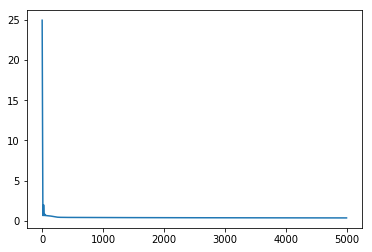

Accuracy of the model on the training data : 63 %

Confusion matrix for training:
tensor([[  3.,  30.,   6.,   0.,   0.],
        [  4., 401., 127.,   1.,   0.],
        [  0., 138., 347.,  38.,   0.],
        [  0.,   8.,  90.,  63.,   0.],
        [  5.,   3.,   7.,   8.,   0.]])
test loss: 0.635905
Accuracy of the model on the test data : 51 %

Confusion matrix for testing:
tensor([[  6.,   7.,   1.,   0.,   0.],
        [ 19., 104.,  23.,   2.,   0.],
        [  6.,  58.,  46.,   5.,   0.],
        [  0.,   7.,  22.,   9.,   0.],
        [  0.,   2.,   1.,   2.,   0.]])


/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:165: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:166: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [ ]:
"""
This script provides an example of building a regression
model for wine quality dataset on
https://archive.ics.uci.edu/ml/datasets/Wine+Quality
"""

# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


"""
Step 1: Load data and pre-process data
"""
# load all data
data = pd.read_csv('./winequality-red.csv', sep=";")

# wine with quality greater than 5.5 has good quality
# wine with quality less than 5.5 has poor quality
#data['quality'] = (data['quality'] >= 5.5).astype(int)

# randomly split data into training set (80%) and testing set (20%)
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]

n_features = train_data.shape[1] - 1

# split data into input and target
# the first 11 columns are features, the last one is target
train_input = train_data.iloc[:, :n_features]
train_target = train_data.iloc[:, n_features]
# print(train_input)
# assert(0)
# normalise input data by columns
for column in train_input:
    train_input[column] = train_input.loc[:, [column]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

test_input = test_data.iloc[:, :n_features]
test_target = test_data.iloc[:, n_features]

# normalise input data by columns
for column in test_input:
    test_input[column] = test_input.loc[:, [column]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# create Tensors to hold inputs and outputs
X = torch.Tensor(train_input.as_matrix()).float()
Y = torch.Tensor(train_target.as_matrix()).float()

"""
Step 2: Define a regression model 

Here we build a logistic regression model
"""
# define the number of inputs, classes, training epochs, and learning rate
input_size = n_features
num_classes = 1
hidden = 6
learning_rate = 0.05
num_epochs = 5000

print(n_features)


# define regression model
class Regression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Regression, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden)
        self.linear2 = nn.Linear(hidden, num_classes)

    def forward(self, x):
        out = torch.sigmoid(self.linear1(x))
        out = self.linear2(out)

        return out


reg_model = Regression(input_size, num_classes)

"""
Step 3: Train a regression model
"""
# define loss function
criterion = nn.MSELoss()

# define optimiser
optimizer = torch.optim.Adam(reg_model.parameters(), lr=learning_rate)

# store all losses for visualisation
all_losses = []

# turn plot on
#plt.ion()

# start training
for epoch in range(num_epochs):
    # Perform forward pass: compute predicted y by passing x to the model.
    Y_pred = reg_model(X)
    Y_pred = Y_pred.view(len(Y_pred))

    # compute loss
    loss = criterion(Y_pred, Y)
    all_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print('Training Epoch: [%d/%d], Loss: %.4f'
              % (epoch + 1, num_epochs, loss.item()))

    # clear the gradients before running the backward pass.
    optimizer.zero_grad()

    # perform backward pass
    loss.backward()

    # call the step function on an Optimiser makes an update to its
    # parameters
    optimizer.step()


# Optional: plotting historical loss from ``all_losses`` during network learning
# Please uncomment me from next line to ``plt.show()`` if you want to plot loss

import matplotlib.pyplot as plt
#
plt.figure()
plt.plot(all_losses)
plt.show()


Y_pred = reg_model(X)

predicted = torch.round(Y_pred.data)

total = predicted.size(0)
predicted = predicted.view(predicted.size(0))

confusion = torch.zeros((round(torch.max(Y).item()) - round(torch.min(Y).item())), (round(torch.max(Y).item()) - round(torch.min(Y).item())))

correct = 0
for i in range(train_data.shape[0]):
    actual_class = int(Y.data[i].item())
    predicted_class = int(predicted.data[i].item())
    if(actual_class == predicted_class):
        correct += 1
    #print(predicted_class)
    #print(actual_class)

    confusion[actual_class- int(torch.min(Y).item()) - 1][min((max((predicted_class- int(torch.min(Y).item())-1),0)),(int(torch.max(Y).item()) - int(torch.min(Y).item())))] += 1

print('Accuracy of the model on the training data : %d %%' % (100 * float(correct) / total))

print('')
print('Confusion matrix for training:')
print(confusion)

"""
Step 4: Test the regression model

Pass testing data to the built regression model and get its performance
"""

X_test = torch.Tensor(test_input.as_matrix()).float()
Y_test = torch.Tensor(test_target.as_matrix()).float()

# get predicted outputs
Y_pred_test = reg_model(X_test)
test_loss = criterion(Y_pred_test.view(Y_pred_test.size(0)), Y_test)
print('test loss: %f' % test_loss.item())
predicted_test = torch.round(Y_pred_test.data)


# get performance
total_test = predicted_test.size(0)
predicted_test = predicted_test.view(predicted_test.size(0))
correct_test = sum(predicted_test == Y_test.data)

print('Accuracy of the model on the test data : %d %%' % (100 * float(correct_test) / total_test))

confusion_test = torch.zeros((int(torch.max(Y_test).item()) - int(torch.min(Y_test).item())), (int(torch.max(Y_test).item()) - int(torch.min(Y_test).item())))

for i in range(X_test.shape[0]):
    actual_class = int(Y_test.data[i].item())
    predicted_class = int(predicted_test.data[i].item())

    confusion_test[actual_class- int(torch.min(Y_test).item()) - 1][min((max((predicted_class- int(torch.min(Y_test).item())-1),0)),(int(torch.max(Y_test).item()) - int(torch.min(Y_test).item())))] += 1

print('')
print('Confusion matrix for testing:')
print(confusion_test)
